In [1]:
import os
import numpy as np
import torch
import glob
from PIL import Image
import cv2
import manga109api
import torchvision
from torchvision import transforms
from src.dataset import Resizer, Normalizer
from src.model import EfficientDet
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
PATH = "mangadet.pth"

In [3]:
model = EfficientDet(num_classes = 2).cuda()
model.load_state_dict(torch.load(PATH))
model.eval()

Loaded pretrained weights for efficientnet-b0


EfficientDet(
  (conv3): Conv2d(40, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv4): Conv2d(80, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv5): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv6): Conv2d(192, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv7): Sequential(
    (0): ReLU()
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (bifpn): Sequential(
    (0): BiFPN(
      (conv6_up): ConvBlock(
        (conv): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
          (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (2): BatchNorm2d(64, eps=4e-05, momentum=0.9997, affine=True, track_running_stats=True)
          (3): ReLU()
        )
      )
      (conv5_up): ConvBlock(
        (conv): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
          (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
 

In [4]:
image_base_path = "F:\\Datasets\\Manga109\\images\\"
manga109_root_dir = "F:\\Datasets\\Manga109"
p = manga109api.Parser(root_dir=manga109_root_dir)

In [5]:
book = "ARMS"
image_full_path = image_base_path + book + '\\'
annotation = p.get_annotation(book=book)

In [6]:
page_index = 19
img = cv2.imread(p.img_path(book=book, index=page_index))
#img = cv2.imread("5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512,512))
img = img.astype(np.float32) / 255.
img = torch.from_numpy(img).unsqueeze(0)
img = img.permute(0, 3, 1, 2).double().cuda()

In [7]:
with torch.no_grad():
    out = model(img)

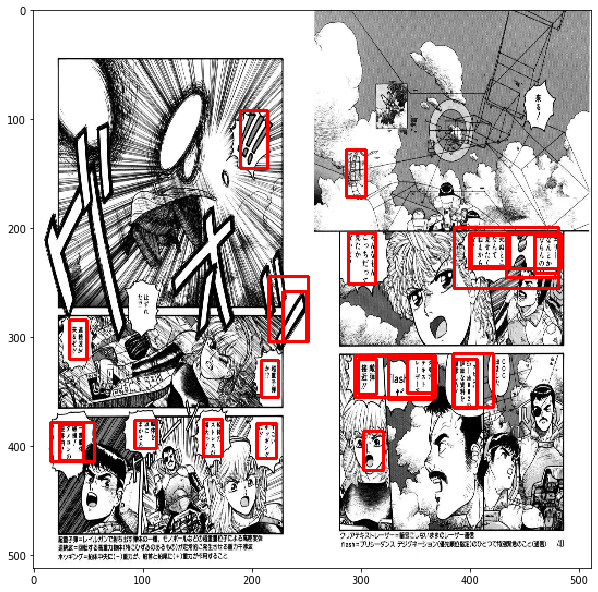

In [9]:
img = cv2.imread(p.img_path(book=book, index=page_index))
#img = cv2.imread("5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512,512))
for co in out[2]:
    color = (255, 0, 0)
    thickness = 2
    start_point = (int(co[0]), int(co[1]))
    end_point = (int(co[2]), int(co[3]))
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
plt.figure(figsize=(10,12)) 
plt.imshow(img)

In [10]:
cv2.imwrite("out.png", img)

True